In [ ]:
# Import Library
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import re
import joblib
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec

In [ ]:
# Dataset cleaning
dataset_path = "https://storage.googleapis.com/allergysavvy/Food_Recipe.csv"

# Panda framework
df = pd.read_csv(dataset_path)

In [ ]:
# Displaying the first 20 rows of the DataFrame 'df'
display(df.head(20))

# Displaying the number of rows and columns in the dataset
num_rows, num_cols = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

,name,description,cuisine,course,diet,ingredients_name,ingredients_quantity,prep_time (in mins),cook_time (in mins),instructions,image_url
0,Khandeshi Dal Recipe,Khandeshi Dal is definitely a new name for alm...,Maharashtrian Recipes,Lunch,High Protein Vegetarian,"Green Moong Dal (Whole), Pink Masoor Dal (Spli...",2 tablespoons Green Moong Dal (Whole) 2 table...,10.0,30.0,"To begin making the Khandeshi Dal recipe, we w...",https://www.archanaskitchen.com/images/archana...
1,Padipe Saasmi Recipe - Udupi Style Amaranth Le...,Cuisine of our country is amazing and the vari...,Udupi,Side Dish,Vegetarian,"Red Amaranth Leaves, Fresh coconut, Dry Red Ch...","12 sprig Red Amaranth Leaves , You can use spi...",15.0,20.0,"To begin making the Padipe Saasmi Recipe, pluc...",https://www.archanaskitchen.com/images/archana...
2,Creamy Polenta Recipe - Savory Cornmeal Porridge,Creamy Polenta Recipe is a a dish common in It...,Italian Recipes,Side Dish,Vegetarian,"Polenta, Water, Milk, Extra Virgin Olive Oil, ...",1 cup Polenta 4 cups Water 1 cup Milk 1 tab...,0.0,20.0,"To begin making the Creamy Polenta Recipe, hea...",https://www.archanaskitchen.com/images/archana...
3,Summer Lettuce Salad Recipe,The Summer Lettuce Salad Recipe is perfect for...,Continental,Appetizer,Vegan,"Cherry tomatoes, Red onion, Cucumber, Sweet co...","10 Cherry tomatoes , halved 1 Red onion , ong...",20.0,0.0,"To begin making Summer Lettuce Salad Recipe, c...",https://www.archanaskitchen.com/images/archana...
4,Dondakkai Puli Curry Recipe - South Indian Sty...,Dondakkai Puli Curry is one of those tradition...,Tamil Nadu,Lunch,Vegetarian,"Tindora (Dondakaya/ Kovakkai), Black Urad Dal ...",150 grams Tindora (Dondakaya/ Kovakkai) 3 tab...,20.0,25.0,To begin making the Dondakkai Puli Curry Recip...,https://www.archanaskitchen.com/images/archana...
5,Kasuri Methi Aur Aloo Rasedar Recipe,Kasuri Methi Aur Aloo Rasedar Recipe is an eas...,North Indian Recipes,Side Dish,Vegetarian,"Potatoes (Aloo), Tomatoes, Ginger, Green Chill...","2 cups Potatoes (Aloo) , boiled and roughly ma...",20.0,10.0,To begin making Kasuri Methi Aur Aloo Rasedar ...,https://www.archanaskitchen.com/images/archana...
6,Poosanikai Haddu Sweet Curry Recipe - Pumpkin ...,Pumpkin Sweet Curry Recipe is a South Indian V...,Tamil Nadu,Side Dish,Vegetarian,"Kaddu (Parangikai/ Pumpkin), Mustard seeds (Ra...","250 grams Kaddu (Parangikai/ Pumpkin) , diced ...",10.0,20.0,To begin making the Pumpkin Sweet Curry Recipe...,https://www.archanaskitchen.com/images/archana...
7,Konkani Style Vengaya Sagle Recipe - Eggplant ...,Konkani Style Vengaya Sagle Recipe is a very f...,Konkan,Lunch,Vegetarian,"Drumstick, Brinjal (Baingan / Eggplant), Musta...","1 Drumstick , cut into 2 inch long 4 Brinjal ...",10.0,25.0,To begin making the Konkani Style Vengaya Sagl...,https://www.archanaskitchen.com/images/archana...
8,Ayam Goreng Kremes Recipe - Indonesian Style C...,Ayam Goreng Kremes is chicken made Indonesian ...,Indonesian,Appetizer,High Protein Non Vegetarian,"Cashew nuts, Garlic, Onion, Lemon juice, Kaffi...",1/4 cup Cashew nuts 8 cloves Garlic 1 Onion ...,10.0,20.0,"To begin making the Ayam Goreng Kremes, in a m...",https://www.archanaskitchen.com/images/archana...
9,Mangalore Cucumber Chana Dal Subzi Recipe,Mangalore Cucumber Chana Dal Sabzi Recipe is a...,Mangalorean,Lunch,Vegetarian,"Mangalorean cucumber, Chana dal (Bengal Gram D...","1 Mangalorean cucumber , cut into bite sized p...",10.0,30.0,To begin making the Mangalore Cucumber Chana D...,https://www.archanaskitchen.com/images/archana...


Jumlah baris: 6911
Jumlah kolom: 11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6911 entries, 0 to 6910
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  6911 non-null   object 
 1   description           6910 non-null   object 
 2   cuisine               6853 non-null   object 
 3   course                6775 non-null   object 
 4   diet                  6779 non-null   object 
 5   ingredients_name      6904 non-null   object 
 6   ingredients_quantity  6904 non-null   object 
 7   prep_time (in mins)   6888 non-null   float64
 8   cook_time (in mins)   6888 non-null   float64
 9   instructions          6911 non-null   object 
 10  image_url             6911 non-null   object 
dtypes: float64(2), object(9)
memory usage: 594.0+ KB


In [ ]:
# Calculating and displaying the number of missing (null) values for each column in the DataFrame 'df'
df.isna().sum()

name                      0
description               1
cuisine                  58
course                  136
diet                    132
ingredients_name          7
ingredients_quantity      7
prep_time (in mins)      23
cook_time (in mins)      23
instructions              0
image_url                 0
dtype: int64

In [ ]:
# List of columns to be dropped
columns_to_drop = ['description', 'course', 'diet', 'prep_time (in mins)']


df.columns = df.columns.str.capitalize()

desired_columns = ['Name', 'Image_url', 'Cuisine', 'Cook_time (in mins)', 'Ingredients_name', 'Ingredients_quantity', 'Instructions']
df = df.reindex(columns=desired_columns)


print("\nDataFrame after the changes:")
display(df.head())


print("\nCurrent number of rows and columns:")
print(df.shape)


In [ ]:
# Function to detect Indian language characters
def contains_indian_language(text):

    indian_language_regex = re.compile(r'[\u0900-\u097F]+')
    if indian_language_regex.search(str(text)):
        return True
    return False

# Detect all rows that contain Indian language characters
rows_with_indian_language = df.applymap(contains_indian_language).any(axis=1)


indian_language_rows = df[rows_with_indian_language]

# Display all rows that contain Indian language characters
display(indian_language_rows)


,Name,Image_url,Cuisine,Cook_time (in mins),Ingredients_name,Ingredients_quantity,Instructions
355,Green Moong Dal Sabzi (Recipe In Hindi),https://www.archanaskitchen.com/images/archana...,Gujarati Recipes﻿,45.0,"हरी मूंग दाल, जीरा, कढ़ी पत्ता, अदरक, हरी मिर्च...","1/2 कप हरी मूंग दाल , या हरे मूंग 1 छोटा चमच्...","To make green moong sabzi, first soak the moon..."
770,Cabbage Tomato Sabzi (Recipe In Hindi),https://www.archanaskitchen.com/images/archana...,North Indian Recipes,15.0,"पत्ता गोभी, टमाटर, हल्दी पाउडर, धनिया पाउडर, न...","300 ग्राम्स पत्ता गोभी , पतला काट ले 2 टमाटर ...","To make cabbage curry, first heat oil in a pre..."
774,Nuvvula Pachadi Recipe - Nuvvula Pachadi Recipe,https://www.archanaskitchen.com/images/archana...,Indian,10.0,"तिल (सफ़ेद), लाल मिर्च पाउडर, इमली का पानी, दही...",1 कप तिल (सफ़ेद) 1 छोटा चमच्च लाल मिर्च पाउडर ...,"To make Nuvvula Pachadi recipe, first heat a p..."
1326,Ragi Badam Soup Recipe,https://www.archanaskitchen.com/images/archana...,Indian,10.0,"रागी का आटा, प्याज, अदरक, गाजर, बादाम, हरा बीन...","2 बड़े चम्मच रागी का आटा 1 प्याज , बारीक काट ल...","To make Ragi Almond Soup recipe, first soak th..."
1624,चीज़ी आलू पराठा - Cheesy Aloo Paratha (Recipe I...,https://www.archanaskitchen.com/images/archana...,North Indian Recipes,15.0,"गेहूं का आटा, तेल, नमक, पानी, आलू, तेल, सुखी ल...",आटे के लिए 1 कप गेहूं का आटा 1 छोटा चमच्च तेल...,चीज़ी आलू पराठा बनाने के लिए सबसे पहले एक बड़ा ब...
...,...,...,...,...,...,...,...
6471,कश्मीरी दम मोंजी रेसिपी - Knol Khol in Yogurt ...,https://www.archanaskitchen.com/images/archana...,Kashmiri,30.0,"नोल नोल, सरसो का तेल, अदरक लहसुन का पेस्ट , कश...","3 नोल नोल , हरे पत्तो के साथ 4 बड़ा चमच्च सरस...",कश्मीरी दम मोंजी बनाने के लिए सबसे पहले नोल नो...
6482,अंकुरित दालो की सब्ज़ी रेसिपी - Mixed Sprouts S...,https://www.archanaskitchen.com/images/archana...,Indian,30.0,"अंकुरित दाल , पानी , तेल, जीरा, हींग, प्याज, अ...","2 कटोरी अंकुरित दाल पानी , प्रयोग अनुसार 2 ...",अंकुरित दालो की सब्ज़ी बनाने के लिए सबसे पहले ड...
6483,Peshawari Kala Chana Recipe – Peshawari Kala C...,https://www.archanaskitchen.com/images/archana...,Pakistani,30.0,"काला चना, प्याज, टमाटर, अदरक, हरी मिर्च, दालची...","2 cups black gram, sprouted 1 onion, finely ch...","To make Peshawari Kala Chana, first cook the b..."
6491,कश्मीरी वेठ चमन रेसिपी - Paneer in Yogurt Toma...,https://www.archanaskitchen.com/images/archana...,Kashmiri,20.0,"पनीर, पानी , हींग, दालचीनी, इलाईची, तेजपत्ता, ...","300 ग्राम्स पनीर , क्यूब्स में काटा हुआ 1-1/...",कश्मीरी वेठ चमन बनाने के लिए सबसे पहले कढ़ाई मे...


In [ ]:
def remove_indian_language(text):
    indian_language_regex = re.compile(r'[\u0900-\u097F]+')
    cleaned_text = indian_language_regex.sub('', str(text))
    
    if cleaned_text.strip() == '':
        return None
    else:
        return cleaned_text

# Apply the removal function to every element in the DataFrame
df = df.applymap(remove_indian_language)

# Drop rows with any missing values
df_cleaned = df.dropna(how='any')

# Display the first few rows of the cleaned dataset
print("\nFirst few rows of the cleaned dataset:")
display(df_cleaned.head())

# Function to check if Indian language characters still exist
def contains_indian_language(text):
    indian_language_regex = re.compile(r'[\u0900-\u097F]+')
    return bool(indian_language_regex.search(str(text)))

# Check if any Indian language characters still exist
contains_indian = df_cleaned.applymap(contains_indian_language).any().any()
if not contains_indian:
    print("\nNo more Indian language characters in the cleaned dataset.")
else:
    print("\nThere are still Indian language characters in the cleaned dataset.")



Beberapa baris pertama dari dataset yang telah dibersihkan:


,Name,Image_url,Cuisine,Cook_time (in mins),Ingredients_name,Ingredients_quantity,Instructions
0,Khandeshi Dal Recipe,https://www.archanaskitchen.com/images/archana...,Maharashtrian Recipes,30.0,"Green Moong Dal (Whole), Pink Masoor Dal (Spli...",2 tablespoons Green Moong Dal (Whole) 2 table...,"To begin making the Khandeshi Dal recipe, we w..."
1,Padipe Saasmi Recipe - Udupi Style Amaranth Le...,https://www.archanaskitchen.com/images/archana...,Udupi,20.0,"Red Amaranth Leaves, Fresh coconut, Dry Red Ch...","12 sprig Red Amaranth Leaves , You can use spi...","To begin making the Padipe Saasmi Recipe, pluc..."
2,Creamy Polenta Recipe - Savory Cornmeal Porridge,https://www.archanaskitchen.com/images/archana...,Italian Recipes,20.0,"Polenta, Water, Milk, Extra Virgin Olive Oil, ...",1 cup Polenta 4 cups Water 1 cup Milk 1 tab...,"To begin making the Creamy Polenta Recipe, hea..."
3,Summer Lettuce Salad Recipe,https://www.archanaskitchen.com/images/archana...,Continental,0.0,"Cherry tomatoes, Red onion, Cucumber, Sweet co...","10 Cherry tomatoes , halved 1 Red onion , ong...","To begin making Summer Lettuce Salad Recipe, c..."
4,Dondakkai Puli Curry Recipe - South Indian Sty...,https://www.archanaskitchen.com/images/archana...,Tamil Nadu,25.0,"Tindora (Dondakaya/ Kovakkai), Black Urad Dal ...",150 grams Tindora (Dondakaya/ Kovakkai) 3 tab...,To begin making the Dondakkai Puli Curry Recip...



Tidak ada lagi karakter bahasa India di dalam dataset yang telah dibersihkan.


In [ ]:

print("\nCurrent number of rows and columns:")
print(df.shape)

In [ ]:
# Removing missing values
df.dropna(inplace=True)

# Removing duplicates
df.drop_duplicates(inplace=True)

In [ ]:

file_path = '/content/Food_Recipe_Cleaned.csv'
df.to_csv(file_path, index=False)


In [ ]:

dataset_path = "https://storage.googleapis.com/allergysavvy/Food_Recipes_Cleaned.csv"


df = pd.read_csv(dataset_path)

In [ ]:

df

,Name,Image_url,Cuisine,Cook_time (in mins),Ingredients_name,Ingredients_quantity,Instructions
0,Khandeshi Dal Recipe,https://www.archanaskitchen.com/images/archana...,Maharashtrian Recipes,30.0,"Green Moong Dal (Whole), Pink Masoor Dal (Spli...",2 tablespoons Green Moong Dal (Whole) 2 table...,"To begin making the Khandeshi Dal recipe, we w..."
1,Padipe Saasmi Recipe - Udupi Style Amaranth Le...,https://www.archanaskitchen.com/images/archana...,Udupi,20.0,"Red Amaranth Leaves, Fresh coconut, Dry Red Ch...","12 sprig Red Amaranth Leaves , You can use spi...","To begin making the Padipe Saasmi Recipe, pluc..."
2,Creamy Polenta Recipe - Savory Cornmeal Porridge,https://www.archanaskitchen.com/images/archana...,Italian Recipes,20.0,"Polenta, Water, Milk, Extra Virgin Olive Oil, ...",1 cup Polenta 4 cups Water 1 cup Milk 1 tab...,"To begin making the Creamy Polenta Recipe, hea..."
3,Summer Lettuce Salad Recipe,https://www.archanaskitchen.com/images/archana...,Continental,0.0,"Cherry tomatoes, Red onion, Cucumber, Sweet co...","10 Cherry tomatoes , halved 1 Red onion , ong...","To begin making Summer Lettuce Salad Recipe, c..."
4,Dondakkai Puli Curry Recipe - South Indian Sty...,https://www.archanaskitchen.com/images/archana...,Tamil Nadu,25.0,"Tindora (Dondakaya/ Kovakkai), Black Urad Dal ...",150 grams Tindora (Dondakaya/ Kovakkai) 3 tab...,To begin making the Dondakkai Puli Curry Recip...
...,...,...,...,...,...,...,...
6874,Tuna Roasted Mushroom Sandwich Recipe with Tar...,https://www.archanaskitchen.com/images/archana...,Continental,30.0,"Ciabatta bread, Canned tuna, Button mushrooms,...","2 Ciabatta bread , halved 125 grams Canned tu...",To begin making Tuna Mushroom Tartare Dip Mayo...
6875,Tomato Onion Bruschetta With Mint Mayo Recipe,https://www.archanaskitchen.com/images/archana...,Italian Recipes,20.0,"Baguette, Onions, Tomatoes, Del Monte Mint May...","1 Baguette , sliced 2 Onions , finely chopped...",To begin making the Tomato Onion Bruschetta wi...
6876,Tomatoes Stuffed With Mint Mayo And Paneer Recipe,https://www.archanaskitchen.com/images/archana...,Continental,30.0,"Paneer (Homemade Cottage Cheese), Del Monte Mi...","1/4 cup Paneer (Homemade Cottage Cheese) , cru...",To begin making the Tomatoes Stuffed With Mint...
6877,Shrimp Stir Fry With Cheesy Dip Mayo Recipe,https://www.archanaskitchen.com/images/archana...,Asian,45.0,"Green Bell Pepper (Capsicum), Red Bell pepper ...","1/2 Green Bell Pepper (Capsicum) , julienned ...",To prepare Shrimp Stir Fry With Cheesy Dip May...


In [ ]:
# Step 1: Gathering, Preparing, and Processing Data
def load_and_process_data(data_path):
    # Load data
    df = pd.read_csv(data_path)
    df['Ingredients_name'] = df['Ingredients_name'].astype(str)

    # Function to tokenize ingredients
    def tokenize_ingredients(ingredients):
        ingredients = re.sub(r'[^\w\s]', '', ingredients)  # Remove punctuation
        tokens = ingredients.lower().split()  # Convert to lowercase and split
        return tokens

    # Apply tokenization to the ingredients column
    df['tokenized_ingredients'] = df['Ingredients_name'].apply(tokenize_ingredients)
    return df

# Example usage
df = load_and_process_data('https://storage.googleapis.com/allergysavvy/Food_Recipes_Cleaned.csv')
df

,Name,Image_url,Cuisine,Cook_time (in mins),Ingredients_name,Ingredients_quantity,Instructions,tokenized_ingredients
0,Khandeshi Dal Recipe,https://www.archanaskitchen.com/images/archana...,Maharashtrian Recipes,30.0,"Green Moong Dal (Whole), Pink Masoor Dal (Spli...",2 tablespoons Green Moong Dal (Whole) 2 table...,"To begin making the Khandeshi Dal recipe, we w...","[green, moong, dal, whole, pink, masoor, dal, ..."
1,Padipe Saasmi Recipe - Udupi Style Amaranth Le...,https://www.archanaskitchen.com/images/archana...,Udupi,20.0,"Red Amaranth Leaves, Fresh coconut, Dry Red Ch...","12 sprig Red Amaranth Leaves , You can use spi...","To begin making the Padipe Saasmi Recipe, pluc...","[red, amaranth, leaves, fresh, coconut, dry, r..."
2,Creamy Polenta Recipe - Savory Cornmeal Porridge,https://www.archanaskitchen.com/images/archana...,Italian Recipes,20.0,"Polenta, Water, Milk, Extra Virgin Olive Oil, ...",1 cup Polenta 4 cups Water 1 cup Milk 1 tab...,"To begin making the Creamy Polenta Recipe, hea...","[polenta, water, milk, extra, virgin, olive, o..."
3,Summer Lettuce Salad Recipe,https://www.archanaskitchen.com/images/archana...,Continental,0.0,"Cherry tomatoes, Red onion, Cucumber, Sweet co...","10 Cherry tomatoes , halved 1 Red onion , ong...","To begin making Summer Lettuce Salad Recipe, c...","[cherry, tomatoes, red, onion, cucumber, sweet..."
4,Dondakkai Puli Curry Recipe - South Indian Sty...,https://www.archanaskitchen.com/images/archana...,Tamil Nadu,25.0,"Tindora (Dondakaya/ Kovakkai), Black Urad Dal ...",150 grams Tindora (Dondakaya/ Kovakkai) 3 tab...,To begin making the Dondakkai Puli Curry Recip...,"[tindora, dondakaya, kovakkai, black, urad, da..."
...,...,...,...,...,...,...,...,...
6874,Tuna Roasted Mushroom Sandwich Recipe with Tar...,https://www.archanaskitchen.com/images/archana...,Continental,30.0,"Ciabatta bread, Canned tuna, Button mushrooms,...","2 Ciabatta bread , halved 125 grams Canned tu...",To begin making Tuna Mushroom Tartare Dip Mayo...,"[ciabatta, bread, canned, tuna, button, mushro..."
6875,Tomato Onion Bruschetta With Mint Mayo Recipe,https://www.archanaskitchen.com/images/archana...,Italian Recipes,20.0,"Baguette, Onions, Tomatoes, Del Monte Mint May...","1 Baguette , sliced 2 Onions , finely chopped...",To begin making the Tomato Onion Bruschetta wi...,"[baguette, onions, tomatoes, del, monte, mint,..."
6876,Tomatoes Stuffed With Mint Mayo And Paneer Recipe,https://www.archanaskitchen.com/images/archana...,Continental,30.0,"Paneer (Homemade Cottage Cheese), Del Monte Mi...","1/4 cup Paneer (Homemade Cottage Cheese) , cru...",To begin making the Tomatoes Stuffed With Mint...,"[paneer, homemade, cottage, cheese, del, monte..."
6877,Shrimp Stir Fry With Cheesy Dip Mayo Recipe,https://www.archanaskitchen.com/images/archana...,Asian,45.0,"Green Bell Pepper (Capsicum), Red Bell pepper ...","1/2 Green Bell Pepper (Capsicum) , julienned ...",To prepare Shrimp Stir Fry With Cheesy Dip May...,"[green, bell, pepper, capsicum, red, bell, pep..."


In [ ]:
# Step 2: Building, Training, and Deploying Model
def train_word2vec(df):
    model = Word2Vec(sentences=df['tokenized_ingredients'], vector_size=100, window=5, min_count=1, workers=4)
    return model

def get_recipe_vector(ingredients, model):
    vector = np.zeros(model.vector_size)
    count = 0
    for ingredient in ingredients:
        if ingredient in model.wv:
            vector += model.wv[ingredient]
            count += 1
    if count > 0:
        vector /= count
    return vector

def build_model(input_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(input_dim,)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(input_dim, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    return model

def train_similarity_model(recipe_vectors):
    input_dim = recipe_vectors.shape[1]
    similarity_model = build_model(input_dim)

    # Split data into training and validation sets
    X_train, X_val = train_test_split(recipe_vectors, test_size=0.2, random_state=42)

    # Callback to display metrics
    class DisplayCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs=None):
            print(f"Epoch {epoch + 1}: loss = {logs['loss']:.4f}, accuracy = {logs['accuracy']:.4f}, val_loss = {logs['val_loss']:.4f}, val_accuracy = {logs['val_accuracy']:.4f}")

    # Train the model
    history = similarity_model.fit(X_train, X_train, epochs=10, batch_size=32, validation_data=(X_val, X_val), callbacks=[DisplayCallback()])

    return similarity_model, history

def save_history(history, filename='models/history.pkl'):
    with open(filename, 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

In [ ]:
# Step 3: Evaluating, Optimizing, and Deploying the Model
def recommend_recipes(user_allergy_ingredients, user_preference_ingredients, df, model, similarity_model):
    user_preference_vector = get_recipe_vector(user_preference_ingredients, model)
    user_preference_vector = similarity_model.predict(np.array([user_preference_vector]))[0]

    def contains_allergens(ingredients, allergens):
        return any(allergen in ingredients for allergen in allergens)

    # Filter out recipes that contain any of the allergy ingredients
    filtered_df = df[~df['tokenized_ingredients'].apply(lambda x: contains_allergens(x, user_allergy_ingredients))]

    # If no recipes are available after filtering, return an empty list
    if filtered_df.empty:
        return []

    similarities = cosine_similarity([user_preference_vector], filtered_df['recipe_vector'].tolist())[0]
    sorted_indices = np.argsort(similarities)[::-1]
    top_indices = sorted_indices[:30]

    recommendations = filtered_df.iloc[top_indices]

    result = [filtered_df.index[top_indices[idx]] for idx in range(len(recommendations))]

    return result

def train_model(data_path):
    # Ensure the models directory exists
    if not os.path.exists('models'):
        os.makedirs('models')

    df = load_and_process_data(data_path)
    word2vec_model = train_word2vec(df)
    pickle.dump(word2vec_model, open('models/word2vec_model.pkl', 'wb'))

    # Generate recipe vectors
    df['recipe_vector'] = df['tokenized_ingredients'].apply(lambda x: get_recipe_vector(x, word2vec_model))
    recipe_vectors = np.stack(df['recipe_vector'].values)

    # Train similarity model
    similarity_model, history = train_similarity_model(recipe_vectors)

    # Save the model
    similarity_model.save('models/recipe_model.h5')
    save_history(history)
    pickle.dump(df, open('models/data_frame1.pkl', 'wb'))

    return df, word2vec_model, similarity_model

def save_history(history):
    with open('models/history.pkl', 'wb') as file:
        pickle.dump(history, file)

# Load the models and data
def load_models():
    df = pickle.load(open('models/data_frame1.pkl', 'rb'))
    word2vec_model = pickle.load(open('models/word2vec_model.pkl', 'rb'))
    similarity_model = tf.keras.models.load_model('models/recipe_model.h5')
    return df, word2vec_model, similarity_model

# Run the training process
data_path = 'https://storage.googleapis.com/allergysavvy/Food_Recipes_Cleaned.csv'
df, word2vec_model, similarity_model = train_model(data_path)

Epoch 1/10
172/172 [==============================] - 1s 3ms/step - loss: 0.0242 - accuracy: 0.4252 - val_loss: 0.0055 - val_accuracy: 0.5901
Epoch 2/10
172/172 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 0.6589 - val_loss: 0.0021 - val_accuracy: 0.6875
Epoch 3/10
172/172 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 0.7198 - val_loss: 0.0012 - val_accuracy: 0.7209
Epoch 4/10
172/172 [==============================] - 0s 2ms/step - loss: 9.7466e-04 - accuracy: 0.7358 - val_loss: 9.2526e-04 - val_accuracy: 0.7406
Epoch 5/10
172/172 [==============================] - 0s 3ms/step - loss: 7.4612e-04 - accuracy: 0.7467 - val_loss: 7.6912e-04 - val_accuracy: 0.7478
Epoch 6/10
172/172 [==============================] - 0s 2ms/step - loss: 6.1561e-04 - accuracy: 0.7561 - val_loss: 6.2408e-04 - val_accuracy: 0.7544
Epoch 7/10
172/172 [==============================] - 0s 2ms/step - loss: 5.2881e-04 - accuracy: 0.7638 - val_loss: 5.7490e-

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


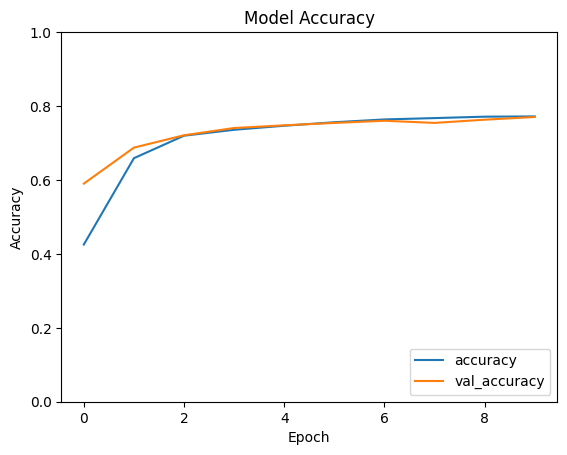

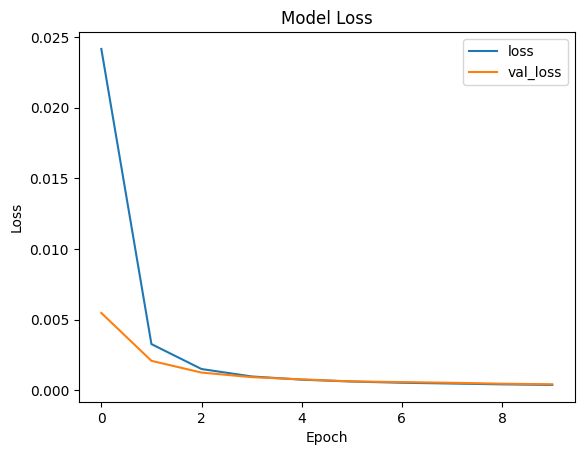

In [ ]:
# Load the model
model = tf.keras.models.load_model('models/recipe_model.h5')

# Load the training history
with open('models/history.pkl', 'rb') as file_pi:
    history = pickle.load(file_pi)

# Function to plot accuracy
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.title('Model Accuracy')
    plt.show()

# Function to plot loss
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title('Model Loss')
    plt.show()

# Plot accuracy and loss
plot_accuracy(history)
plot_loss(history)

In [ ]:

def run_recommendation_system(df, word2vec_model, similarity_model):
    user_allergy_ingredients = input("Enter allergy ingredients (comma separated): ").lower().split(',')
    user_preference_ingredients = input("Enter preferred ingredients (comma separated): ").lower().split(',')

    recommendations = recommend_recipes(user_allergy_ingredients, user_preference_ingredients, df, word2vec_model, similarity_model)
    return recommendations


recommendations = run_recommendation_system(df, word2vec_model, similarity_model)
print(recommendations)

Enter allergy ingredients (comma separated): egg, milk, sauce
Enter preferred ingredients (comma separated): chicken, cheese, pepper
1/1 [==============================] - 0s 57ms/step
[3572, 4044, 6445, 2976, 3707, 1727, 4929, 406, 1237, 3537, 1500, 1003, 1698, 1974, 5803, 2128, 226, 861, 386, 2068, 6313, 5055, 2690, 6429, 3402, 3979, 3571, 731, 735, 6876]


In [ ]:

import json


model = tf.keras.models.load_model('models/recipe_model.h5')

model_json = model.to_json()


with open("recipe_model.json", "w") as json_file:
    json.dump(model_json, json_file)

print("Model telah berhasil dikonversi dan disimpan dalam format JSON.")